# Analiza wpływu spożycia alkoholu na postępy w nauce


## Eksploracja danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
por = pd.read_csv('student-por.csv', parse_dates=True)
mat = pd.read_csv('student-mat.csv', parse_dates=True)

In [3]:
por.info()
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Dane, które będą wykorzystane w danym projekcie zawierają informacje o studentach kursów języka portugalskiego oraz matematyki.
Dane o studentach będą zawierały takie informacje, jak:
1. szkoła
2. płeć 
3. wiek
4. miejsce zamieszkania - U - miasto (urban), R - okolice (rural) 
5. ilość członków rodziny
6. status wspólnego pożycia rodziców
7. wykształcenie matki
8. wykształcenie ojca
9. praca matki
10. praca ojca
11. powód wybrania tej szkoły
12. opiekun ucznia (matka, ojciec, inne)
13. czas dojazdu od domu do szkoły
14. ilość godzin poświęconych nauce w tygodniu
15. liczba niepowodzeń z poprzednich klas
16. dodatkowe nauczanie
17. rodzinne wsparcie edukacyjne
18. zajęcia dodatkowe płatne w ramach przedmiotu kursu
19. zajęcia dodatkowe
20. uczęszczanie do przedszkola
21. wyraz chęci do wykształcenia wyższego
22. dostęp do internetu w domu
23. w związku romantycznym
24. jakość relacji rodzinnych
25. czas wolny poza szkołą
26. wychodzenie z przyjaciółmi
27. spożycie alkoholu w dni robocze
28. spożycie alkoholu w weekend
29. aktualny stan zdrowia
30. liczba nieobecności w szkole

31. ocena za pierwszy semestr
32. ocena za drugi semestr
33. ocena końcowa

<AxesSubplot:>

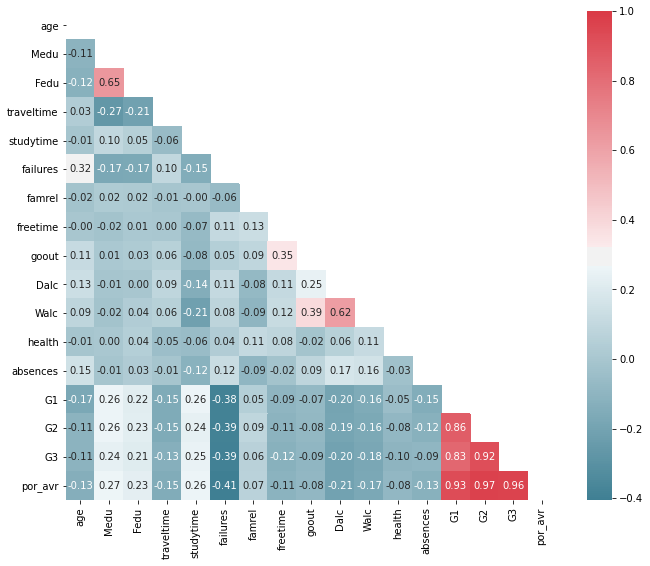

In [5]:
corr_p = por.corr()
dropSelf = np.zeros_like(corr_p)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr_p, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

<AxesSubplot:>

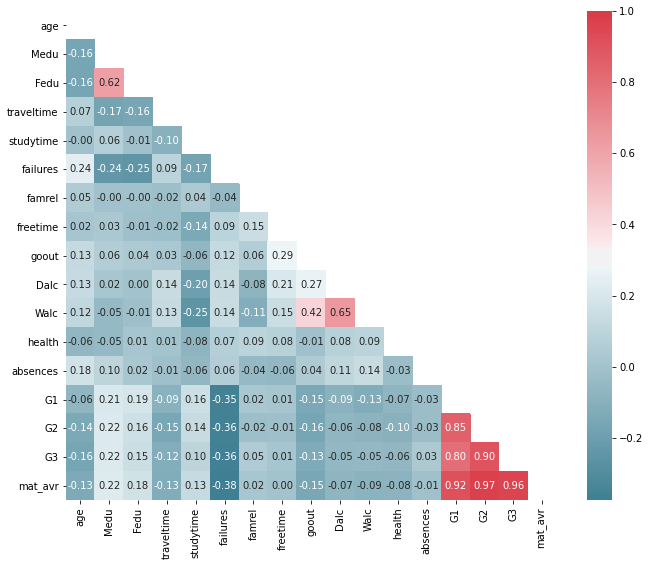

In [6]:
corr_m = mat.corr()
dropSelf = np.zeros_like(corr_m)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(11,9))
sns.heatmap(corr_m, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

Wyraźnie widać, że oceny G1, G2 i G3 są skorelowane w wysokim stopniu z przyczyn oczywistych. Ogólnie inne atrybuty są współzależne na niskim poziomie, ale możemy zauważyć, że na oceny wpływa m. in. ilość poraszek w przeszłości, wykształcenie rodziców oraz czas, spędzony za nauką.
Również współczynnikiem korelacji wydzielają się cechy wykształcena rodziców, zbiory cech 'goout', 'Dalc', 'Walc' i 'freetime', które opisują wychodzenie z przyjaciółmi, spożycie alkoholu w dni powszechne, weekend i czas wolny.

In [7]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,por_avr
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667


In [8]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mat_avr
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


Miary rozrzutu, wyciągnięte za pomocą metody describe(), nie wskazują na znaczną różnicę między statystykami kursów.
Średnia wartość nieobecności jest wyższa w przypadku danych dotyczących kursu matematyki, ale mówiąc o maksymalnej wartości, różni się ona drastycznie - 32-e nieobecności w przypadku kursu języka portugalskiego i 75 w przypadku matematki. Średnia ocena jest niższa dla matematyki o 1 stopień. Również średni czas spędzony na naukę jest nieznacznie wyższy dla matematyki.

In [9]:
print(por.isnull().sum().sum())
print(mat.isnull().sum().sum())

0
0


Dane nie zawierają braków.

In [10]:
gr_common=pd.merge(por,mat,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
print(gr_common.shape[0], " - jest liczbą tych samych studentów w zbiorach - 'por' i 'mat'")

382  - jest liczbą tych samych studentów w zbiorach - 'por' i 'mat'


<AxesSubplot:>

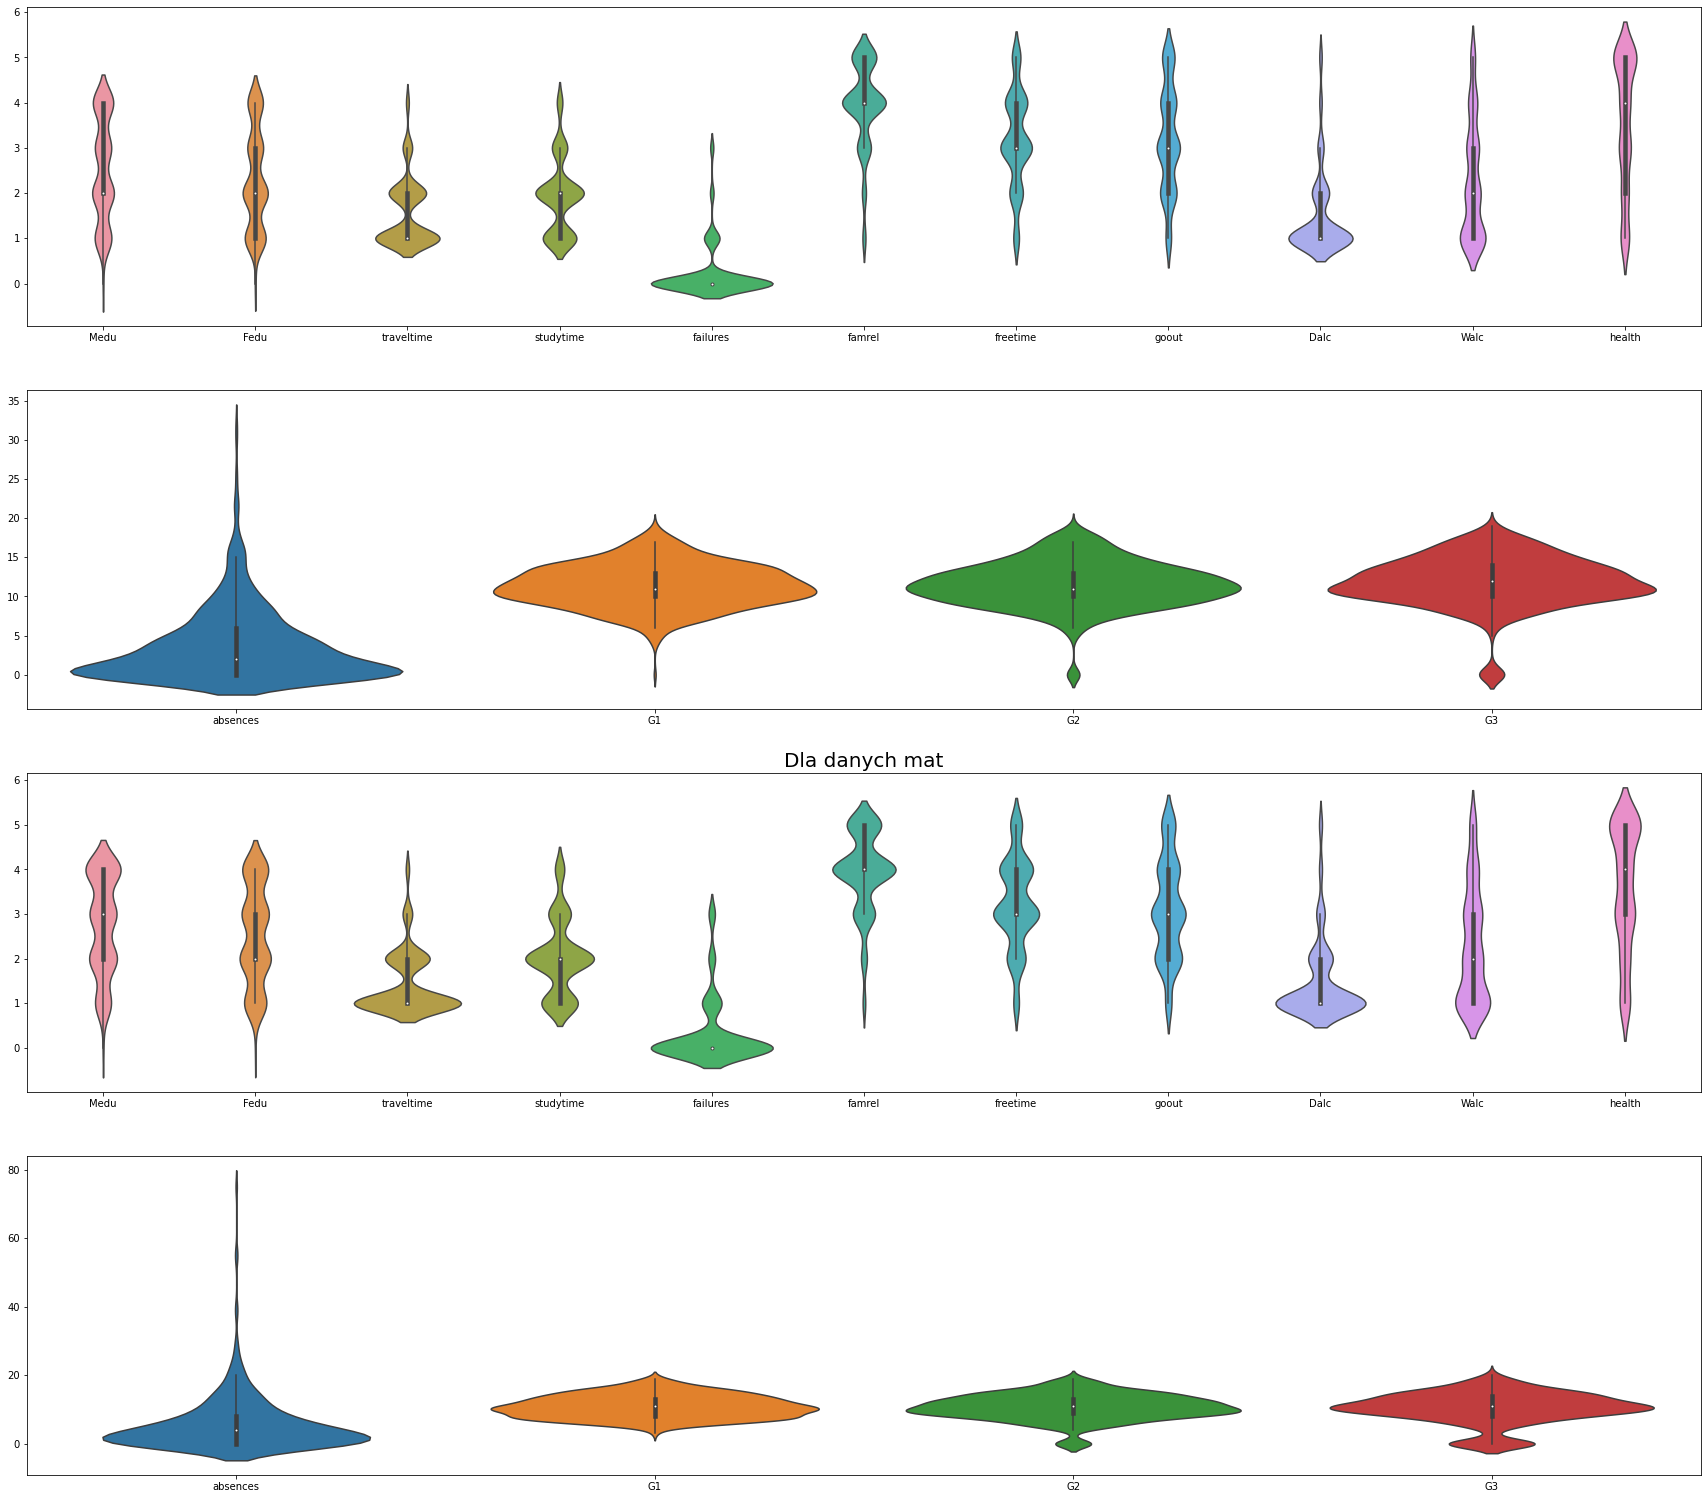

In [11]:
plt.figure(figsize=(30,27))
plt.subplot(4,1,1)
sns.violinplot(data=por.loc[:, 'Medu':'health'])
plt.subplot(4,1,2)
sns.violinplot(data=por.loc[:, 'absences':'G3'])
plt.subplot(4,1,3)
sns.violinplot(data=mat.loc[:, 'Medu':'health']).set_title("Dla danych mat", fontsize=20)
plt.subplot(4,1,4)
sns.violinplot(data=mat.loc[:, 'absences':'G3'])


Widać, że dane są w różnych skalach. Nie ma żadnych punktów odstających, oprócz atrybutu 'absences', który wyraża nieobecność studentów. Również, różnica w danych zbiorów 'por' i 'mat' jest mało zauważalna, chociaż istnieje.
Wykresy skrzypcowe jak i miary rozrzutu wskazują na małą liczbę niezaliczeń tych kursów. Czas spędzony w podróżach i spożycie alkoholu w dni powszechne wydzielają się małymi wartościami.
Co do ocen, nie widać wyraźnej mody, jedyne co można powiedzieć, to jest to że większość ocen jest na poziomie dostatecznym.

Text(0.5, 1.0, 'Age of students by sex for mat data')

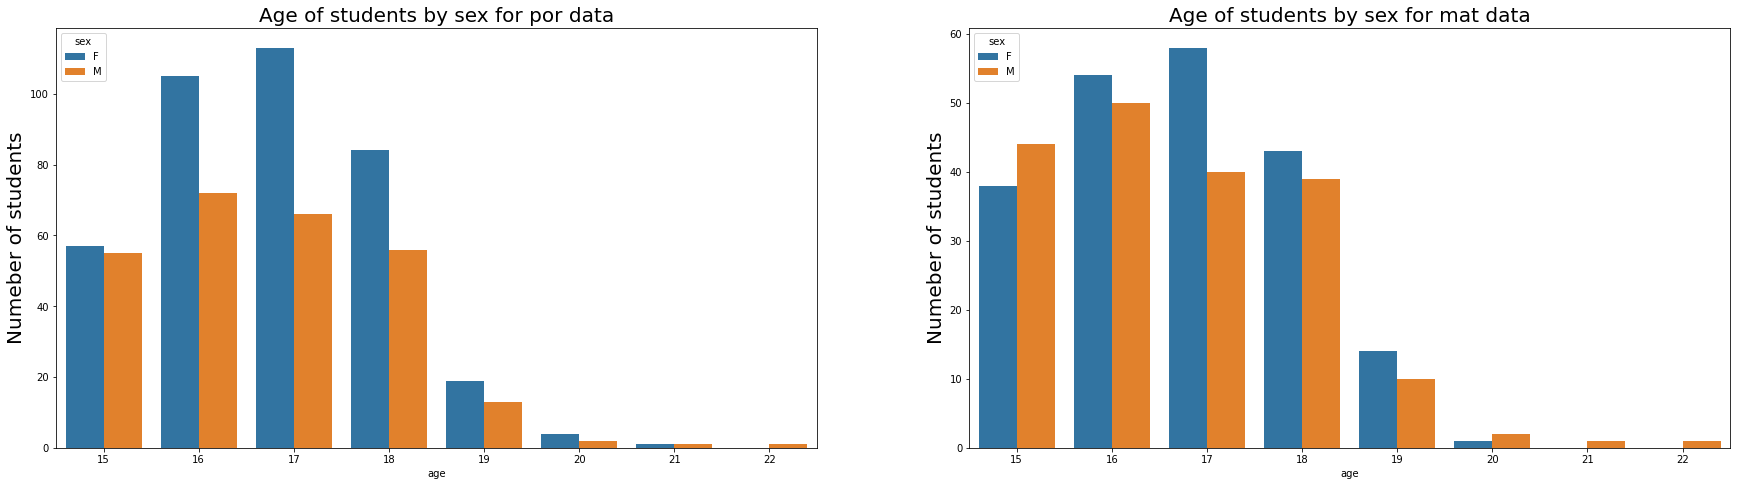

In [12]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
sns.countplot('age', data=por, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Age of students by sex for por data', fontsize=20)
plt.subplot(2, 2, 2)
sns.countplot('age', data=mat, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Age of students by sex for mat data', fontsize=20)

Widać, że najwięcej studentów jest w wieku od 15 do 18 lat. Poza tym, z wykresów można zauważyć, że dziewczyn spośród uczniów jest więcej.

______________________________________________Dla danych mat_________________________________________________________


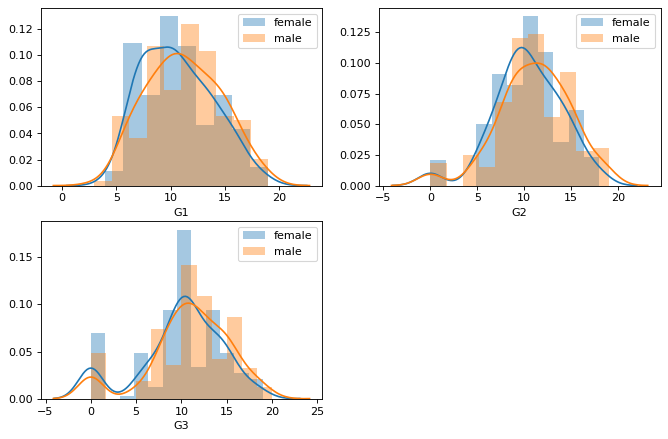

In [13]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3, 2, 1)
sns.distplot(mat.loc[mat.sex == 'F', 'G1'], label="female")
sns.distplot(mat.loc[mat.sex == 'M', 'G1'], label="male")
plt.legend();
plt.subplot(3, 2, 2)
sns.distplot(mat.loc[mat.sex == 'F', 'G2'], label="female")
sns.distplot(mat.loc[mat.sex == 'M', 'G2'], label="male")
plt.legend();
plt.subplot(3, 2, 3)
sns.distplot(mat.loc[mat.sex == 'F', 'G3'], label="female")
sns.distplot(mat.loc[mat.sex == 'M', 'G3'], label="male")
plt.legend();
print("______________________________________________Dla danych mat_________________________________________________________")

Dla danych por


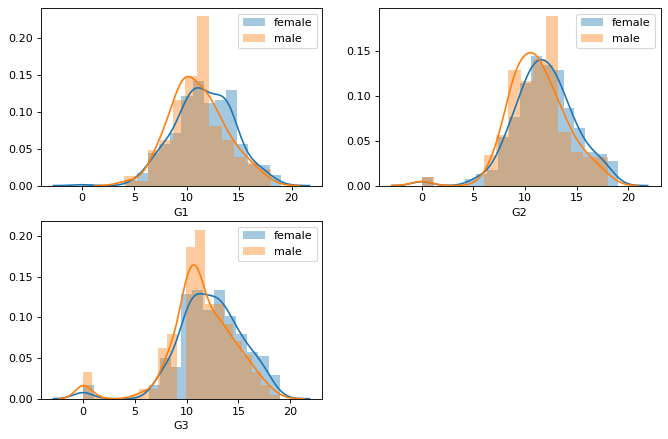

In [14]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3, 2, 1)
sns.distplot(por.loc[por.sex == 'F', 'G1'], label="female")
sns.distplot(por.loc[por.sex == 'M', 'G1'], label="male")
plt.legend();
plt.subplot(3, 2, 2)
sns.distplot(por.loc[por.sex == 'F', 'G2'], label="female")
sns.distplot(por.loc[por.sex == 'M', 'G2'], label="male")
plt.legend();
plt.subplot(3, 2, 3)
sns.distplot(por.loc[por.sex == 'F', 'G3'], label="female")
sns.distplot(por.loc[por.sex == 'M', 'G3'], label="male")
plt.legend();
print("Dla danych por")

Dana analiza określa różnice w ocenach G1, G2 oraz G3 na podstawie płci uczniów. Dana różnica jest mało zauważalna, ale istnieje, co może wynikać z różnicy pomiędzy liczbą dziewczyn a chłopców śród uczniów.

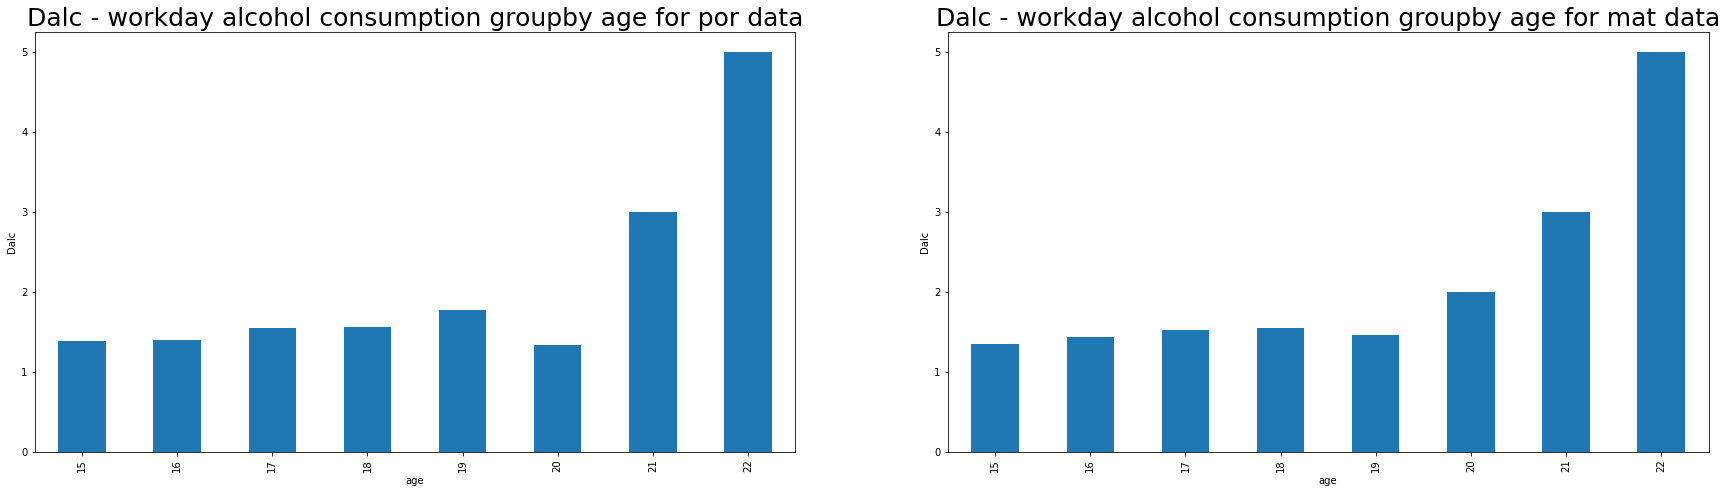

In [15]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('age').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('age').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)

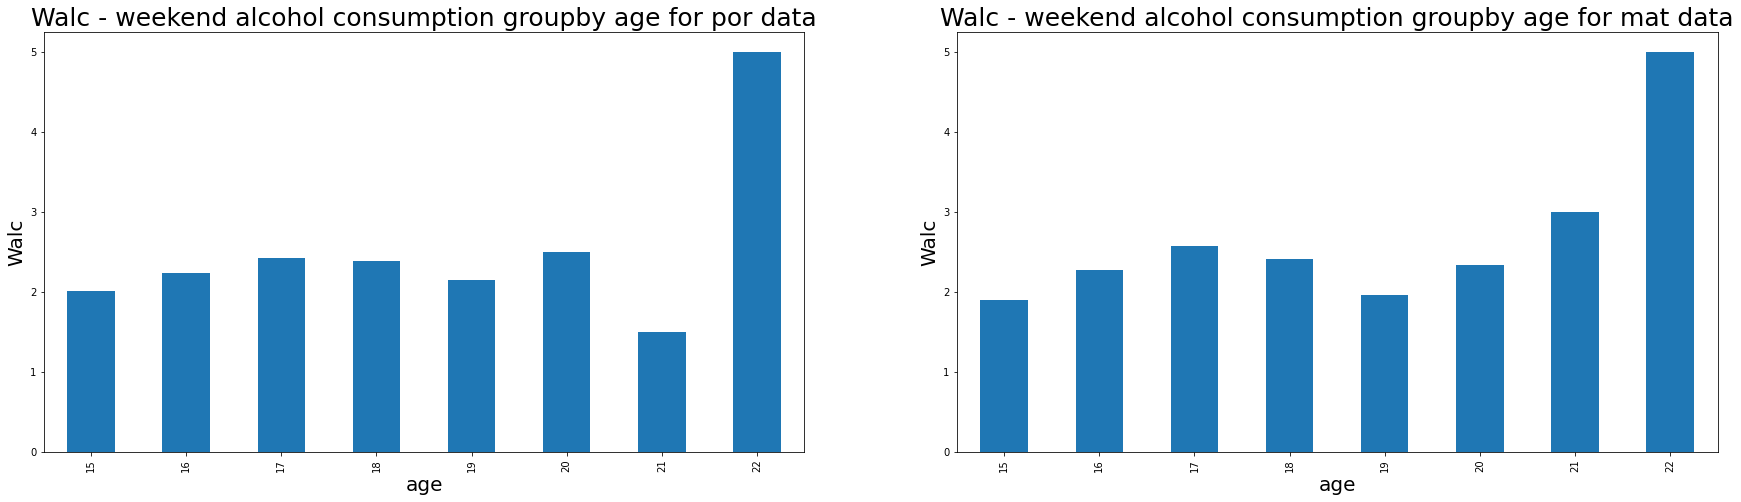

In [16]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(2, 2, 2)
bx = mat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Text(0.5, 1.0, 'Dalc of students by sex for mat data')

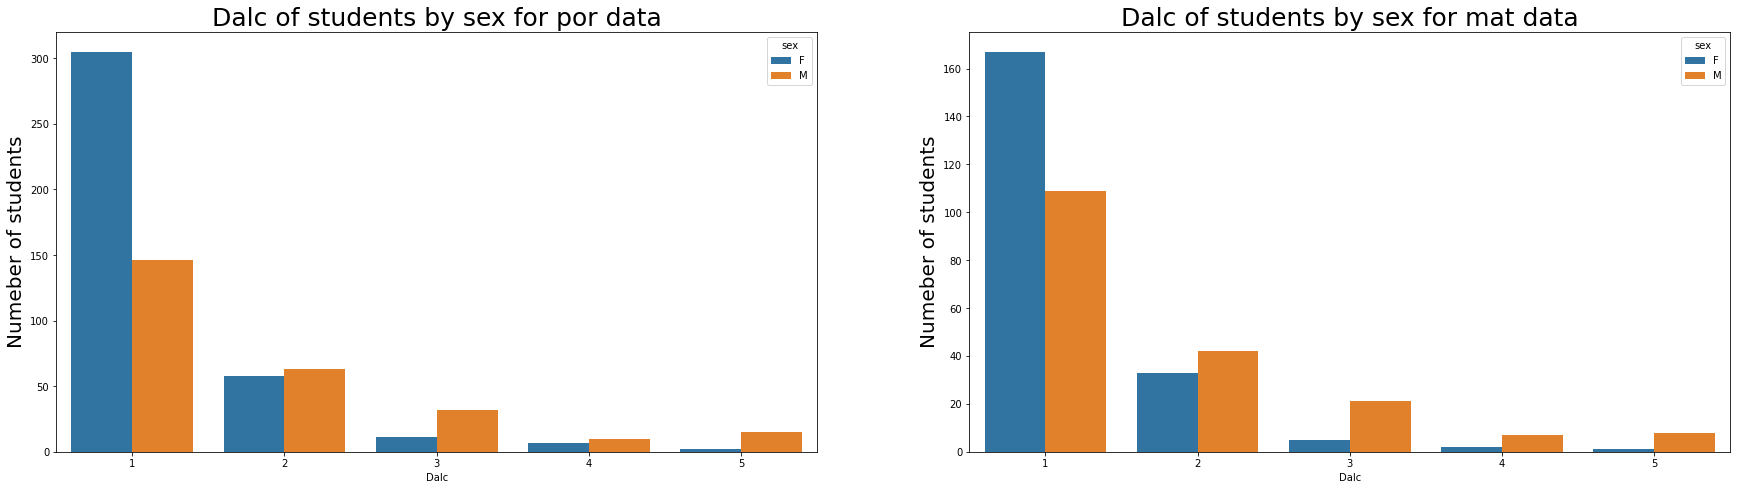

In [17]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
sns.countplot('Dalc', data=por, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Dalc of students by sex for por data', fontsize=25)
plt.subplot(2, 2, 2)
sns.countplot('Dalc', data=mat, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Dalc of students by sex for mat data', fontsize=25)

Text(0.5, 1.0, 'Walc of students by sex for mat data')

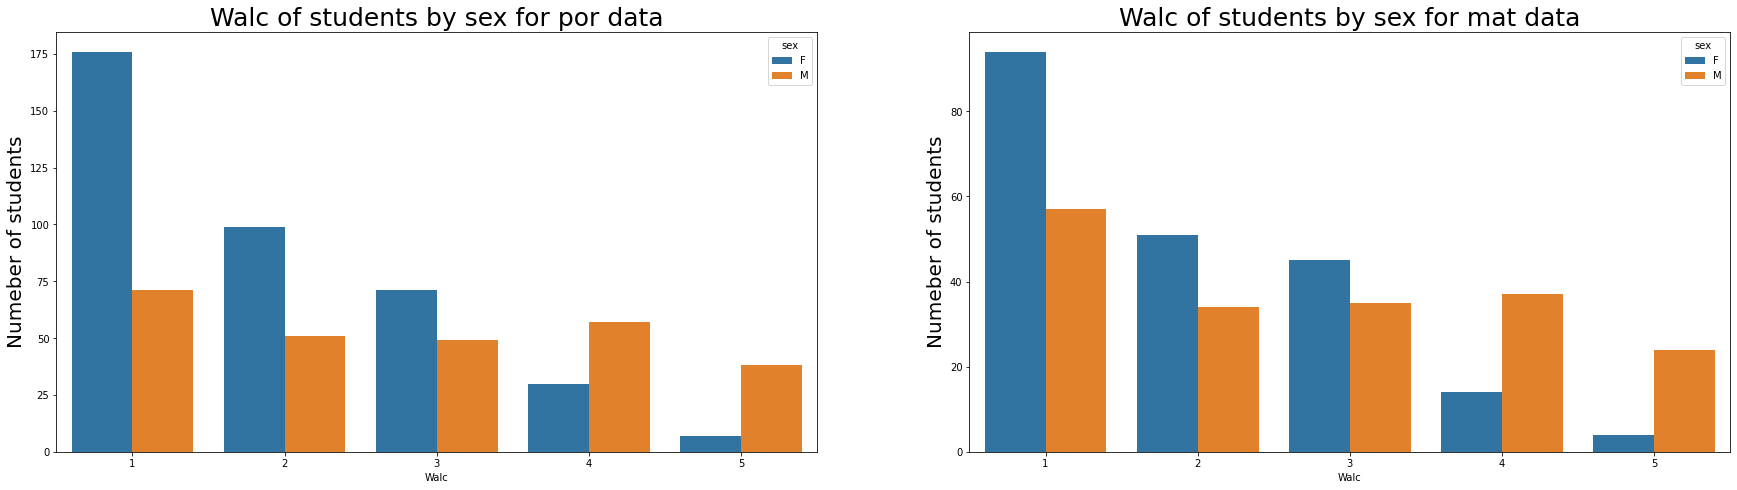

In [18]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
sns.countplot('Walc', data=por, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Walc of students by sex for por data', fontsize=25)
plt.subplot(2, 2, 2)
sns.countplot('Walc', data=mat, hue='sex')
plt.ylabel('Numeber of students', fontsize=20)
plt.title('Walc of students by sex for mat data', fontsize=25)

Analizując powyższe wykresy możemy powiedziec, że najwięcej alkoholu spożywa się przez uczniów w wieku 21-22 lat w dni robocze i 22 lat w weekendy.
Próbując zanalizować te wyniki z pnktu widzenia płci, doszłyśmy do wniosku, że ze wzrostem ilości spożywanego alkoholu rożnie ilość facetów spożywających alkohol w dni robocze. W weekendy, użniowie spożywają więcej alkoholu, niż w dni robocze.

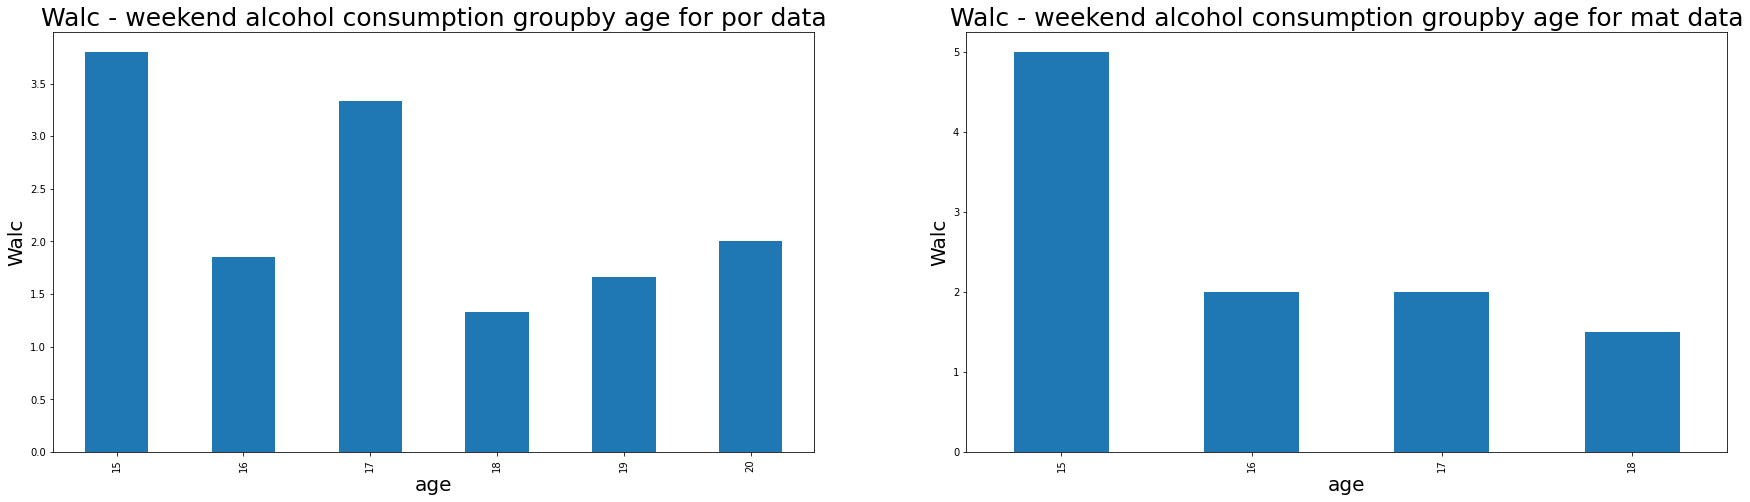

In [19]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
dat = mat[mat.famrel ==1]
pat = por[por.famrel ==1]
ax = pat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(2, 2, 2)
bx = dat.groupby('age').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Powyższy wykres ilustruje ile studentów w rodzinach z niskim poziomem relacji spozywiają alkoholu w weekendy, gdzie wyraźnie widać, że uczniowie w wieku 15 lat spozywiają najwięcej.

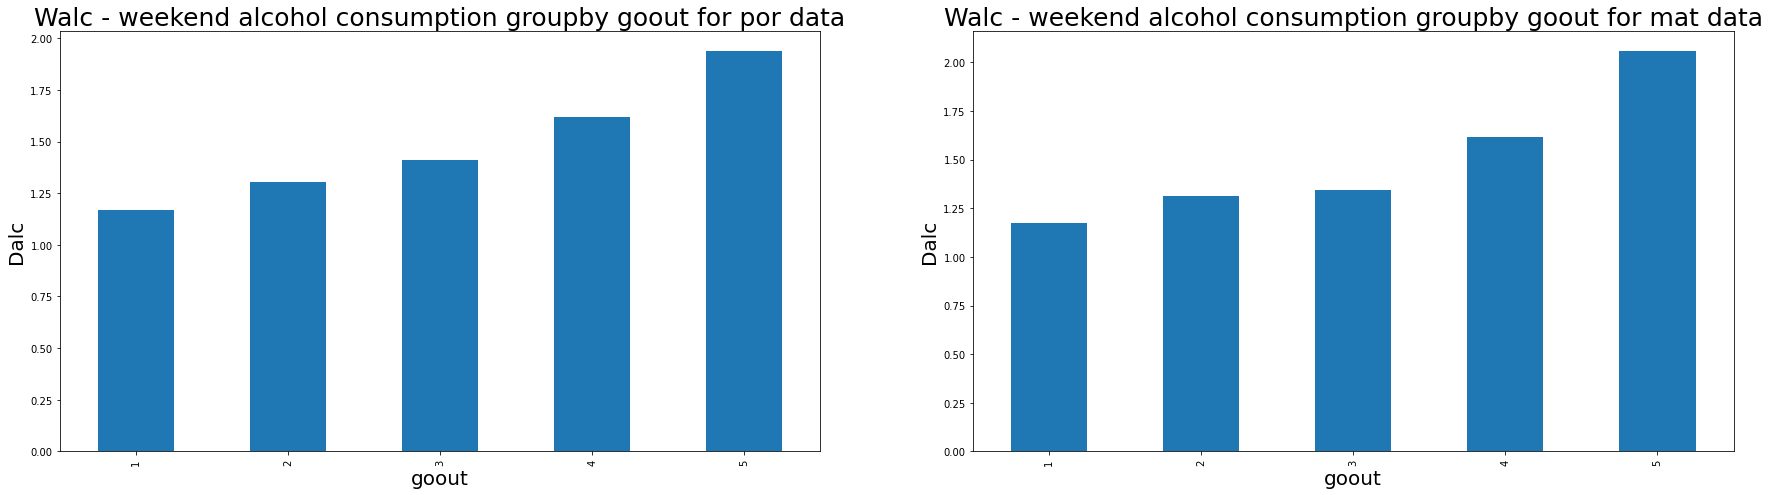

In [20]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('goout').mean()['Dalc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby goout for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
plt.subplot(2, 2, 2)
bx = mat.groupby('goout').mean()['Dalc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby goout for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)
bx.xaxis.label.set_fontsize(20)
bx.yaxis.label.set_fontsize(20)

Text(0.5, 1.0, 'Extra support for students from Portugese class')

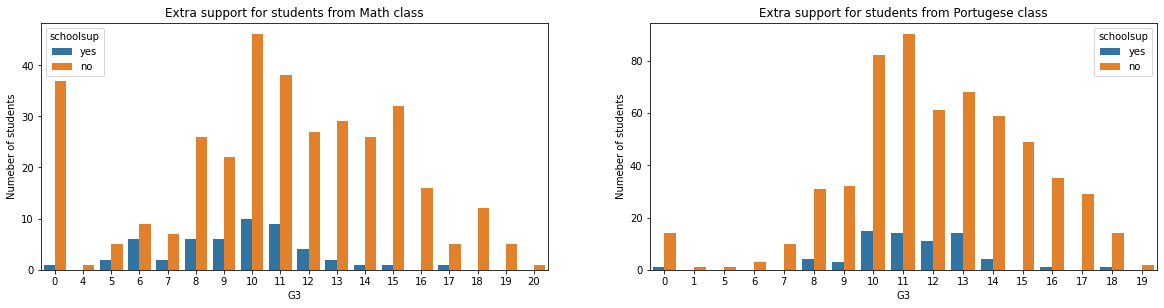

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='schoolsup')
plt.ylabel('Numeber of students')
plt.title('Extra support for students from Math class')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='schoolsup')
plt.ylabel('Numeber of students')
plt.title('Extra support for students from Portugese class')

Text(0.5, 1.0, 'Family support for students from Portugese class')

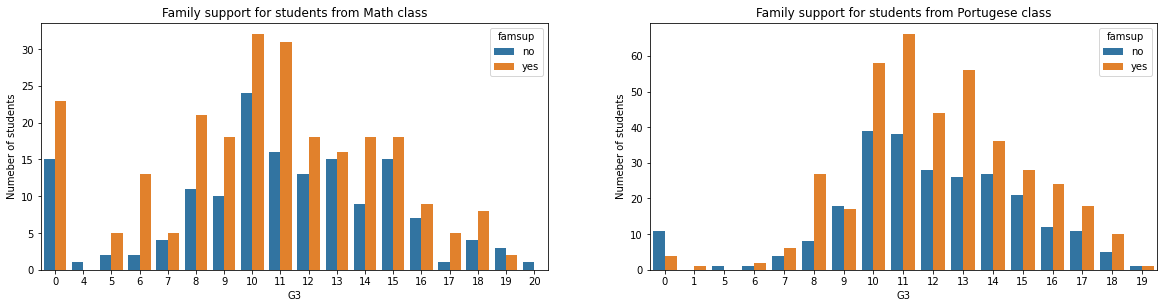

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='famsup')
plt.ylabel('Numeber of students')
plt.title('Family support for students from Math class')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='famsup')
plt.ylabel('Numeber of students')
plt.title('Family support for students from Portugese class')

Widzimy, że oceny nie zależą od dodatkowego nauczania, lecz potencjalnie mogą być zależne od wsparcia rodziny.

Text(0.5, 1.0, 'Failures groupby age for mat data')

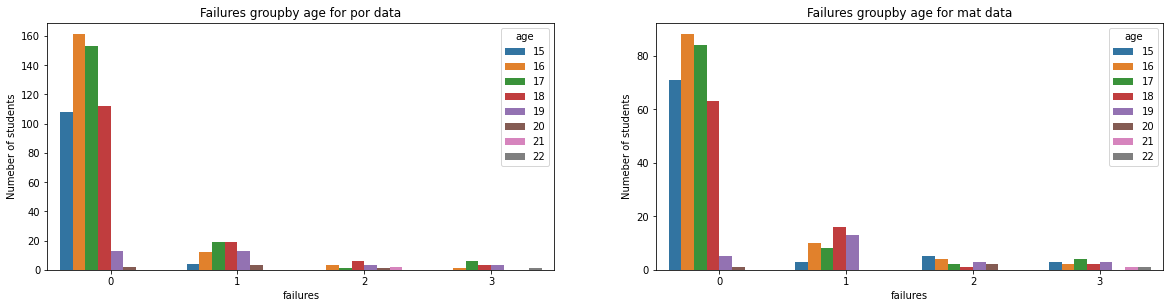

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('failures', data=por, hue='age')
plt.ylabel('Numeber of students')
plt.title('Failures groupby age for por data')
plt.subplot(2, 2, 2)
sns.countplot('failures', data=mat, hue='age')
plt.ylabel('Numeber of students')
plt.title('Failures groupby age for mat data')

Text(0.5, 1.0, 'Grades for Medu')

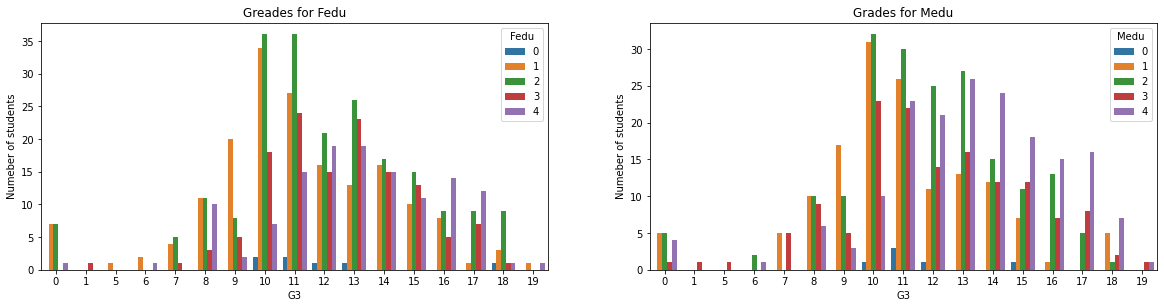

In [30]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=por, hue='Fedu')
plt.ylabel('Numeber of students')
plt.title('Greades for Fedu')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=por, hue='Medu')
plt.ylabel('Numeber of students')
plt.title('Grades for Medu')

Text(0.5, 1.0, 'Grades for Medu')

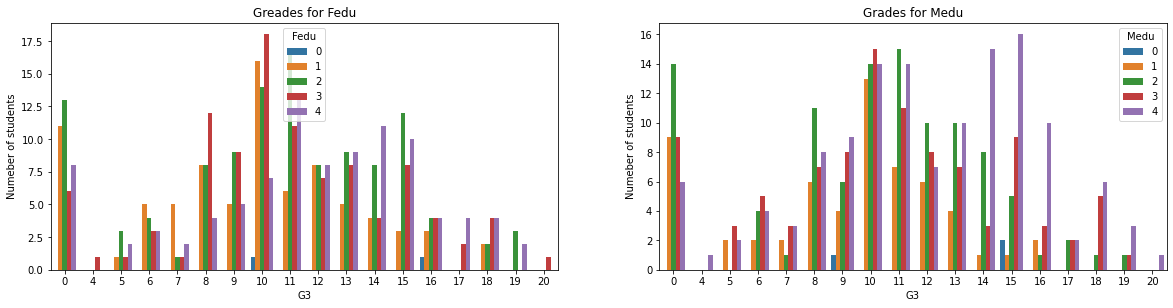

In [31]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='Fedu')
plt.ylabel('Numeber of students')
plt.title('Greades for Fedu')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=mat, hue='Medu')
plt.ylabel('Numeber of students')
plt.title('Grades for Medu')

Text(0.5, 1.0, 'Grades for Dalc')

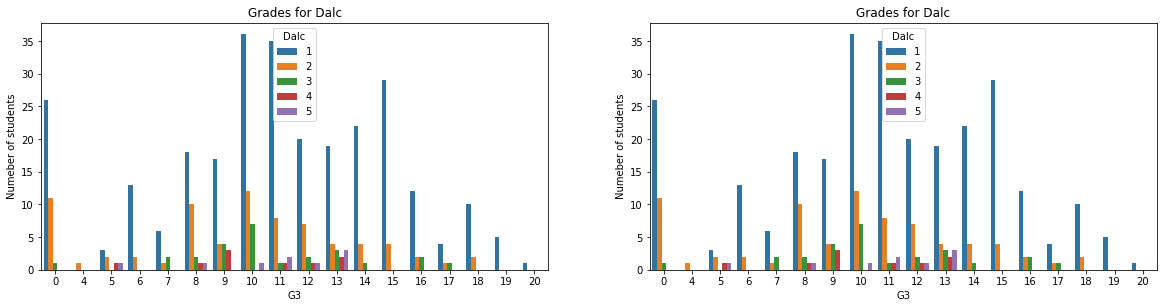

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='Dalc')
plt.ylabel('Numeber of students')
plt.title('Grades for Dalc')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=mat, hue='Dalc')
plt.ylabel('Numeber of students')
plt.title('Grades for Dalc')

Text(0.5, 1.0, 'Grades for Dalc')

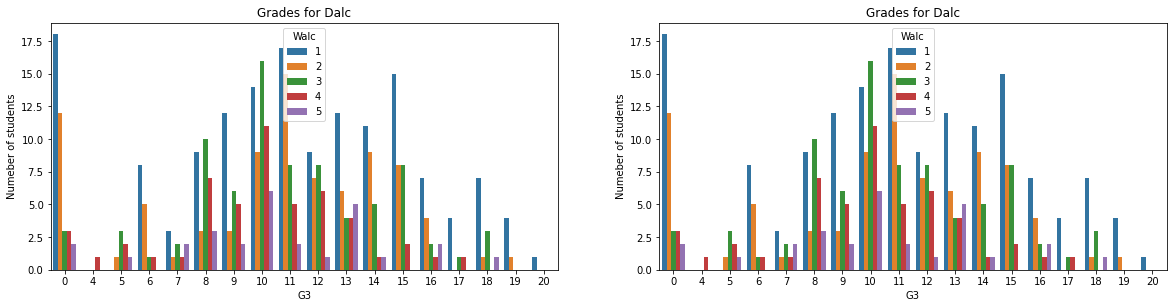

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('G3', data=mat, hue='Walc')
plt.ylabel('Numeber of students')
plt.title('Grades for Dalc')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=mat, hue='Walc')
plt.ylabel('Numeber of students')
plt.title('Grades for Dalc')

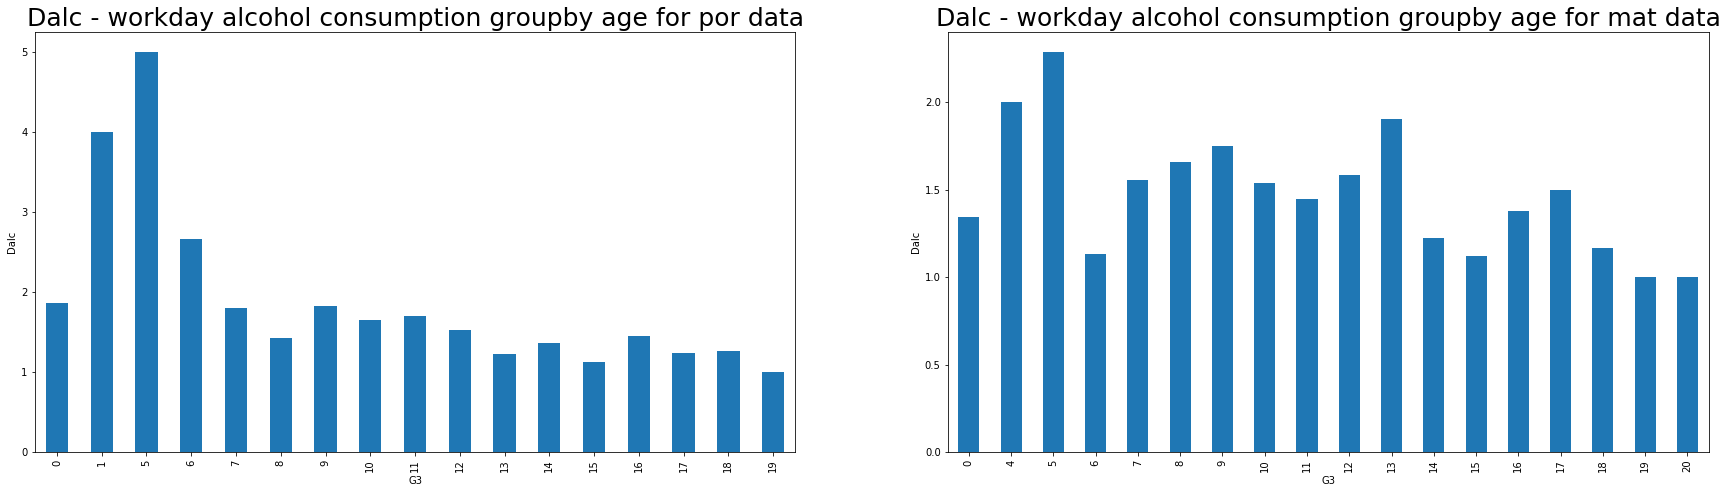

In [92]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('G3').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for por data')
plt.ylabel('Dalc')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('G3').mean()['Dalc'].plot(kind='bar', title='Dalc - workday alcohol consumption groupby age for mat data')
plt.ylabel('Dalc')
bx.title.set_fontsize(25)

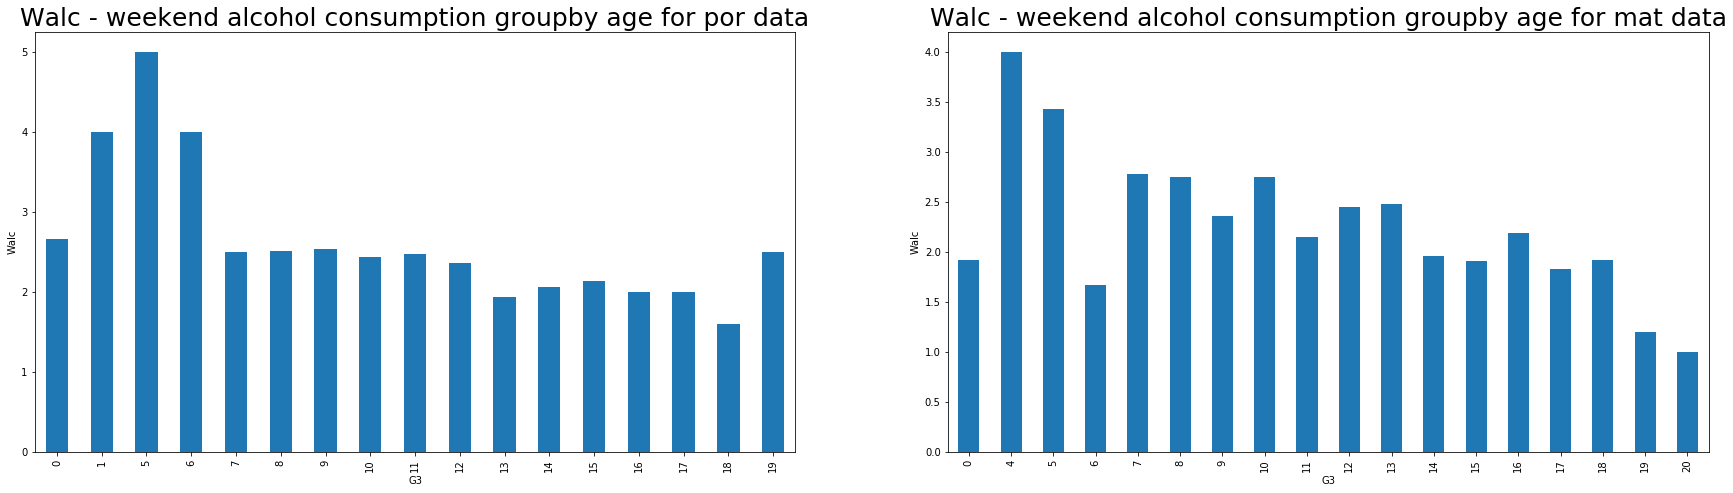

In [105]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('G3').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for por data')
plt.ylabel('Walc')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('G3').mean()['Walc'].plot(kind='bar', title='Walc - weekend alcohol consumption groupby age for mat data')
plt.ylabel('Walc')
bx.title.set_fontsize(25)

Średnią z ocen jest ~11. Najwięcej uczniów, którzy mają ocenę 11 są z rodziny, gdzie rodzice posiadają ukonczone wykształcenie podtawowe (4 - 9 klasy). Natomiast wyżej niż 11 najczęściej posiadają studenci, roszice których ukonczyli wykształcenie średnie lub posiadają wyższe. 

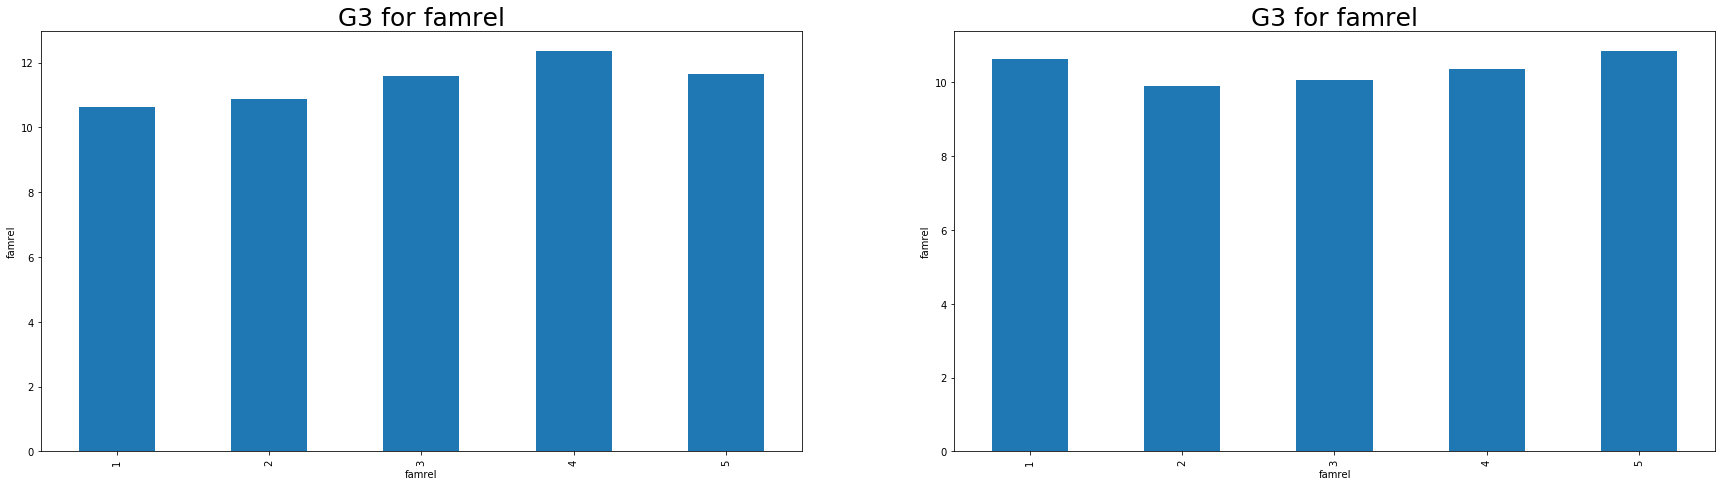

In [104]:
plt.figure(figsize=(30,17))
plt.subplot(2, 2, 1)
ax = por.groupby('famrel').mean()['G3'].plot(kind='bar', title='G3 for famrel')
plt.ylabel('famrel')
ax.title.set_fontsize(25)
plt.subplot(2, 2, 2)
bx = mat.groupby('famrel').mean()['G3'].plot(kind='bar', title='G3 for famrel')
plt.ylabel('famrel')
bx.title.set_fontsize(25)

Text(0.5, 1.0, 'A wish to get higher education by grades (POrtugese class)')

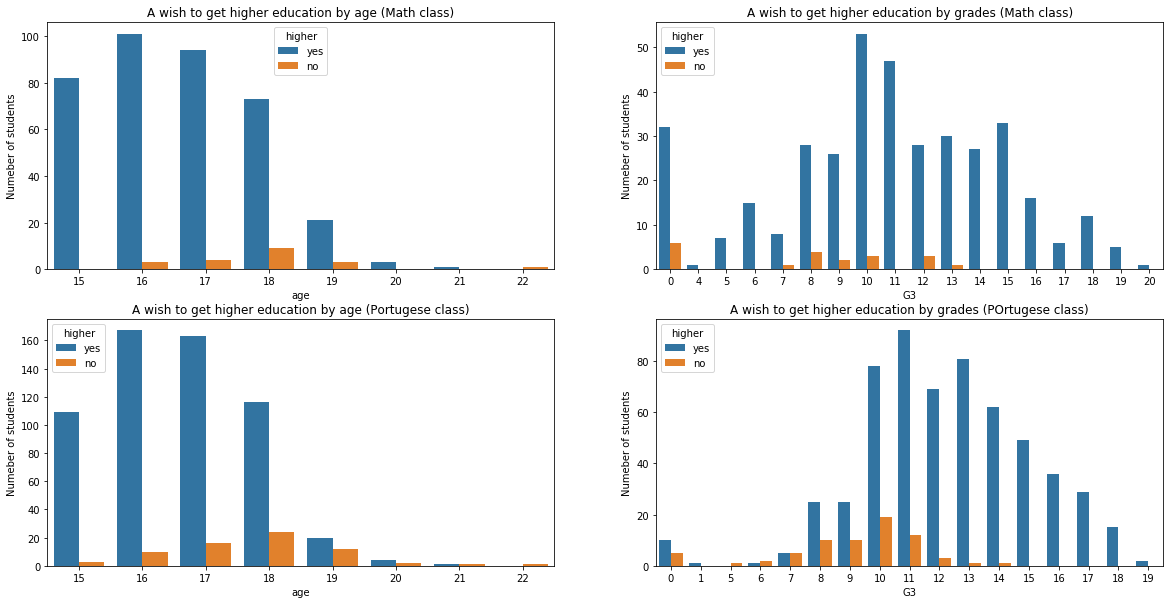

In [112]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot('age', data=mat, hue='higher')
plt.ylabel('Numeber of students')
plt.title('A wish to get higher education by age (Math class)')
plt.subplot(2, 2, 2)
sns.countplot('G3', data=mat, hue='higher')
plt.ylabel('Numeber of students')
plt.title('A wish to get higher education by grades (Math class)')
plt.subplot(2, 2, 3)
sns.countplot('age', data=por, hue='higher')
plt.ylabel('Numeber of students')
plt.title('A wish to get higher education by age (Portugese class)')
plt.subplot(2, 2, 4)
sns.countplot('G3', data=por, hue='higher')
plt.ylabel('Numeber of students')
plt.title('A wish to get higher education by grades (POrtugese class)')

Z przedstawionych wykresów można wywnioskować, że chęć do uzyskania wykształcenia wyższego wyrażają w znacznym ucznie w młodzym wieku. Również widać wyraźną zależność od ocen dla kursu Portugalskiego.

Naturalnie, nie wszytskie cechy są przydatne i niezbędne. Na przykład, w danej analizie nie zostały wzięte pod uwagę takie cechy jak miejsce zamieszkania, praca matki, praca ojca, powód wybrania tej szkoły, opiekun ucznia, uczęszczanie do przedszkola, dostęp do internetu w domu, związki romantyczne, aktualny stan zdrowia, czas dojazdu od domu do szkoły, G1 i G2.


Podsumowując, najbardziej skorelowanymi ocenami cechami są wykształcenie rodziców oraz liczba niepowodzen w zaliczeniu kursu.
Natomiast, powyzsze analizy stały się pomocnicze w wykryciu następujących związków pomiędzy cechami:
1. uczniowie posiadający najmniejsze ocene spożywiają najwięcej alkoholu,
2. najwięcej alkoholu jest spożyte przez uczniów wychodzącyh najwięcej w wolnym czasie,
3. więcej alkoholu piją chłopacy,
4. im lepsze jest wykształcenie rodziców, tym lepsze są postępy w nauce studenta,
5. złe stosunki w rodzinie powodują spożycie alkoholu przez młodzych uczniów,
6. najwięcej niepowodzeń w zaliczeniach jest spośród młodszych uczniów w wieku od 15 do 18 lat



**Przypuszczamy, że oceny końcowe zależą od liczby niepowodzeń w poprzednich klasach, wykształcenia rodziców i wsparcia rodzinnego, chęci do uzyskania wykształcenia wyższego, średniej spożycia alkoholu przez uczniów w dni powszechne i weekend oraz czasu, spędzonego za nauką.**